<a href="https://colab.research.google.com/github/KavyaOS/Machine_Learning/blob/main/OCR_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install
!pip install easyocr

     |████████████████████████████████| 63.0MB 45kB/s 


In [2]:
# imports
from easyocr import Reader
import matplotlib.pyplot as plt
import urllib
import cv2

In [3]:
# helper function
def url_to_image(url):
  resp = urllib.request.urlretrieve(url, 'img_from_web.jpg')
  image = cv2.imread('img_from_web.jpg')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

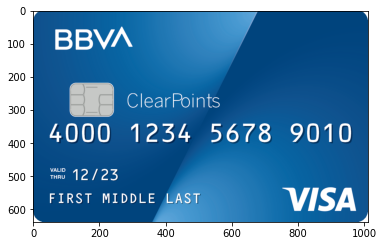

In [4]:
# read url image
# https://www.bbvausa.com/content/dam/bbva/usa/en/photos/checking-and-savings/clearpoints-card-gateway-sm.png

url = "https://www.bbvausa.com/content/dam/bbva/usa/en/photos/checking-and-savings/clearpoints-card-gateway-sm.png"
img = url_to_image(url)

plt.imshow(img)
plt.show()

In [6]:
# OCR

reader = Reader(['en'], gpu=True)
results = reader.readtext(img)

In [7]:
# show results
for x in results:
  print(x)

([[60, 45], [303, 45], [303, 133], [60, 133]], 'BBVA', 0.9991241693496704)
([[279, 243], [575, 243], [575, 305], [279, 305]], 'ClearPoints', 0.9296657627200949)
([[44, 330], [242, 330], [242, 410], [44, 410]], '4000', 0.9740630388259888)
([[288, 332], [484, 332], [484, 410], [288, 410]], '1234', 0.7705193678373223)
([[530, 332], [730, 332], [730, 412], [530, 412]], '5678', 0.5765438655494853)
([[769, 329], [975, 329], [975, 413], [769, 413]], '9010', 0.999998152256012)
([[49, 471], [101, 471], [101, 491], [49, 491]], 'VALID', 0.9997514557400871)
([[49, 493], [99, 493], [99, 511], [49, 511]], 'ThRU', 0.7645882964134216)
([[114, 470], [262, 470], [262, 520], [114, 520]], '12/23', 0.9987905305780584)
([[45, 545], [183, 545], [183, 589], [45, 589]], 'FIRST', 0.9950781891736725)
([[205, 545], [375, 545], [375, 589], [205, 589]], 'MIDDLE', 0.9993133044581898)
([[399, 545], [511, 545], [511, 589], [399, 589]], 'LAST', 0.9997766613960266)
([[755, 525], [983, 525], [983, 617], [755, 617]], 'VIS

In [8]:
# iterate through detections
for (bbox, text, prob) in results:
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  bl = (int(bl[0]), int(bl[1]))
  br = (int(br[0]), int(br[1]))

  cv2.rectangle(img, tl, br, (0, 255, 0), 2)
  cv2.putText(img, text, (tl[0], tl[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255,255), 2)

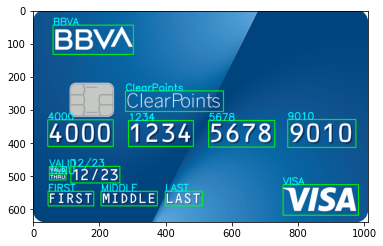

In [10]:
# show results
plt.imshow(img)
plt.show()

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('OCR_IMAGE.jpg', img)

True